<a href="https://colab.research.google.com/github/valuedriven/dataanalysis/blob/master/ml/ml_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML PCA

In [ ]:
url_origem = "https://raw.githubusercontent.com/joaopauloam/metodos_computacionais/6246fbeb154dc834da4da653f8902693af729a8e/aprendizado_maquina/"
arquivo_origem ="liquens.xls"

!wget $url_origem$arquivo_origem -O $arquivo_origem

--2022-12-02 14:59:06--  https://raw.githubusercontent.com/joaopauloam/metodos_computacionais/6246fbeb154dc834da4da653f8902693af729a8e/aprendizado_maquina/liquens.xls
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32768 (32K) [application/octet-stream]
Saving to: ‘liquens.xls’

liquens.xls         100%[===================>]  32.00K  --.-KB/s    in 0.003s  

2022-12-02 14:59:06 (11.5 MB/s) - ‘liquens.xls’ saved [32768/32768]



In [ ]:
#!pip install --upgrade pandas
# workaround para tratar erro de versão de biblioteca: reinstalar xlrd e reiniciar runtime.
!pip install --upgrade --force-reinstall xlrd

In [ ]:
import pandas as pd

df = pd.read_excel(arquivo_origem)
df_numbers = df.iloc[2:,2:]
df_numbers = df_numbers.replace("<LD",0)
df_numbers


In [ ]:
from sklearn.preprocessing import StandardScaler

Xa = StandardScaler().fit_transform(df_numbers)
Xa.shape

(46, 16)

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components=6)
pca.fit(Xa)  
print(pca.explained_variance_ratio_) 
print(np.cumsum(pca.explained_variance_ratio_))
print(pca.singular_values_) 

[0.59583908 0.19583616 0.05633117 0.05138681 0.02733901 0.0228619 ]
[0.59583908 0.79167524 0.84800641 0.89939322 0.92673224 0.94959414]
[20.94128845 12.00564092  6.43892412  6.14985302  4.48570117  4.10199471]


In [ ]:
L= pca.components_.T
L

In [ ]:
T = pca.transform(Xa)
T

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter(x=T[:,0],y=T[:,1], color = df.iloc[2:,1])
fig.update_layout(title='Gŕafico de escores',
                  xaxis_title = 'PC1',
                  yaxis_title = 'PC2')

fig.update_traces(textposition='top center',marker={"size":6})

fig.add_trace(go.Scatter(x = [0,0,0,0,0],y = [-6,-3,1,4,7], mode="lines", name = "PC1 = 0"))

fig.show()

In [ ]:
fig = px.scatter(x=L[:,0],y=L[:,1], text = df_numbers.columns)
fig.update_layout(title='Gŕafico de pesos (loadings)',
                  xaxis_title = 'PC1',
                  yaxis_title = 'PC2')

fig.update_traces(textposition='top center',marker={"size":6})

fig.show()


Dataset de flavonóides.

In [1]:
url_origem = "https://raw.githubusercontent.com/joaopauloam/metodos_computacionais/6246fbeb154dc834da4da653f8902693af729a8e/"
arquivo_origem ="flavonoides.csv"

!wget $url_origem$arquivo_origem -O $arquivo_origem

--2022-12-09 13:18:00--  https://raw.githubusercontent.com/joaopauloam/metodos_computacionais/6246fbeb154dc834da4da653f8902693af729a8e/flavonoides.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 111581 (109K) [text/plain]
Saving to: ‘flavonoides.csv’

flavonoides.csv     100%[===================>] 108.97K  --.-KB/s    in 0.02s   

2022-12-09 13:18:00 (6.24 MB/s) - ‘flavonoides.csv’ saved [111581/111581]



In [5]:
import pandas as pd
flav = pd.read_csv(arquivo_origem,sep='\t',index_col=0)
flav.shape


(20, 556)

In [3]:
X = flav.iloc[:,:-1]
y = flav.iloc[:,-1]
y


mol1    -0.643453
mol2     0.698970
mol3    -0.544068
mol4    -0.954243
mol5     0.000000
mol6     1.000000
mol7    -0.380211
mol8     0.522879
mol9    -0.908485
mol10   -1.033424
mol11    0.537602
mol12   -0.380211
mol13    0.537602
mol14   -0.857332
mol15    0.096910
mol16   -0.977724
mol17    0.154902
mol18    0.221849
mol19   -0.113943
mol20    0.096910
Name: Log (1/ID50), dtype: float64

In [ ]:
# from bokeh.plotting import figure, output_notebook, show
# from bokeh.models import LabelSet, Label, ColumnDataSource
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca = PCA(n_components=6)
Xa = StandardScaler().fit_transform(X)
pca.fit(Xa)
T = pca.fit_transform(Xa)
T

In [6]:
import plotly.express as px
dados = pd.DataFrame(T)
dados.columns = ["PC"+str(i+1) for i in range(dados.shape[1])]
fig = px.scatter_3d(dados, x="PC1", y="PC2", z="PC3",color=y.values, hover_data = [flav.index])
fig.show()


In [7]:
fig = px.scatter_matrix(dados, dimensions=["PC1", "PC2", "PC3", "PC4"], color=y.values)
fig.update_traces(text = flav.index)
fig.show()

In [8]:
T.mean(axis=0)

array([-1.52378110e-15,  1.64313008e-15,  1.04360964e-15,  0.00000000e+00,
        4.88498131e-16,  3.55271368e-16])

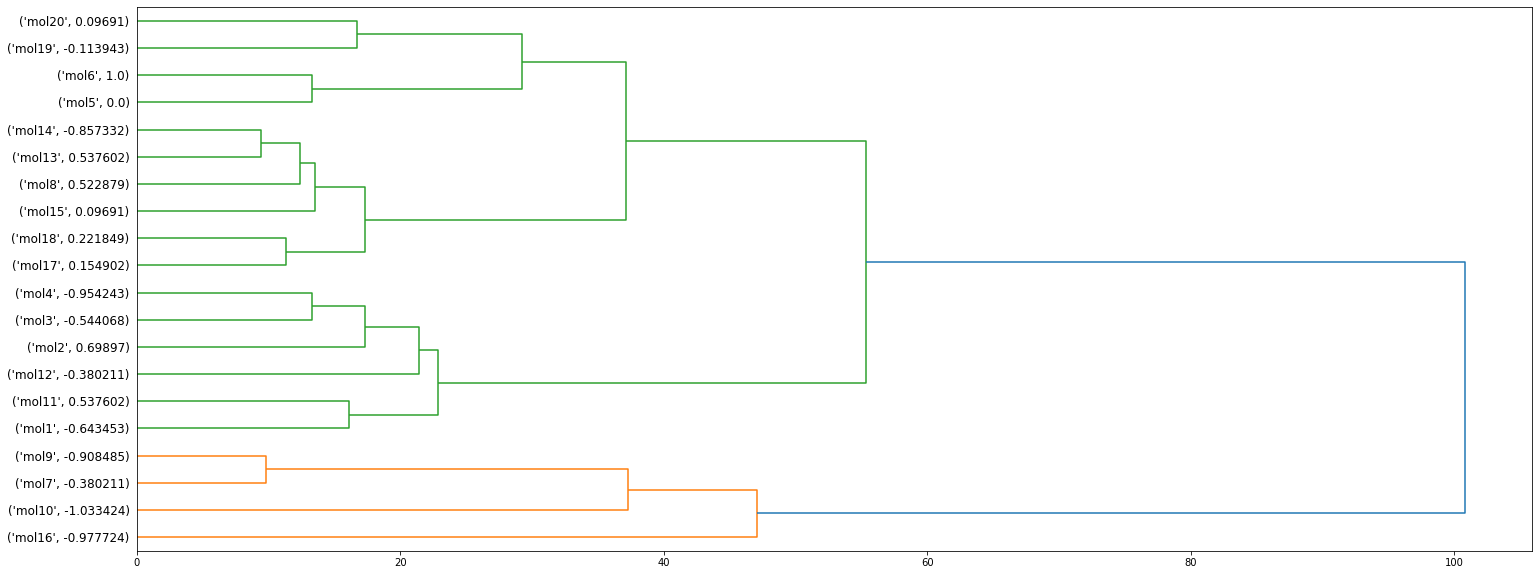

In [9]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

Z = linkage(Xa,'ward')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z,orientation="right", labels=[(flav.index[i],y[i]) for i in range(len(y))])
